# Sklearn

## sklearn.linear_model

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_val_score, train_test_split

import numpy as np

In [66]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [67]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

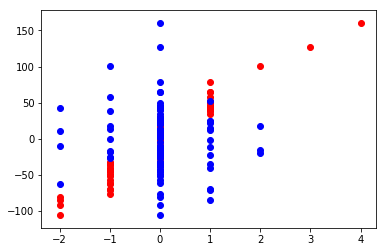

In [69]:
a = map(lambda x:x[0], data)
b = map(lambda x:x[1], data)
pylab.scatter(np.fromiter(a, dtype=np.int), target, color = 'r')
pylab.scatter(np.fromiter(b, dtype=np.int), target, color = 'b')

In [70]:
train_data, test_data, train_labels, test_labels = train_test_split(data, target, test_size = 0.3)

#### LinearRegression

In [36]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [37]:
print (test_labels)

[-10.06708677  -1.42235396  29.8208999  -45.27502383 -13.26392817
 -16.79027112  14.76930132  11.74073026 -35.32062686 -37.31870104
 -27.02798161   0.34799656 -32.71074998  45.05465366  20.87713077
  -0.74051877  22.13032804 -71.3715844  -21.48288019 160.09441244
 -61.47026695  17.64282734  12.47089016  12.74038341 -48.28700118
 -42.44469577  51.87072011  64.19559505 -44.51417742   5.86887774]


In [38]:
print (predictions)

[-1.05537595e+01 -1.51543177e+00  3.11015957e+01 -4.93396902e+01
 -1.72390949e+01 -1.56573733e+01  7.18001869e+00  1.35872603e+01
 -4.30959381e+01 -3.61502674e+01 -2.61066556e+01 -2.55636316e+00
 -4.47654373e+01  4.19746897e+01  1.29319777e+01  1.49053097e-01
  1.95211009e+01 -7.27700533e+01 -2.54894810e+01  1.57824167e+02
 -5.81366400e+01  2.08552290e+01  1.93451712e+01  6.67304346e+00
 -5.73632691e+01 -4.04503194e+01  5.20480774e+01  6.98990068e+01
 -5.60668883e+01  3.92112037e+00]


In [39]:
metrics.mean_absolute_error(test_labels, predictions)

3.914395664733322

In [43]:
linear_scoring = cross_val_score(linear_regressor, data, target, cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 0.9792410447209384, std: 0.020331171766276405


In [44]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [46]:
linear_scoring = cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print ('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779698, std: 1.073710449289019


In [47]:
coef

array([38.07925837,  0.        ])

In [48]:
linear_regressor.coef_

array([38.62675013,  0.29612626])

In [49]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-1.1244315790729251

In [50]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [51]:
print ("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.63*x1 + 0.30*x2 + -1.12


#### Lasso

In [52]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [54]:
lasso_scoring = cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print ('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.154478246666397, std: 1.0170354384993354


In [56]:
print (lasso_regressor.coef_)

[37.77811477  0.        ]


In [57]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [58]:
print ("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.78*x1 + 0.00*x2
